In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('placement.csv')

In [22]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package (LPA)')

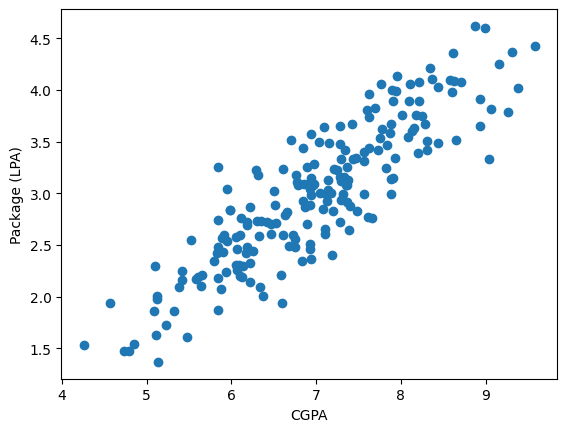

In [23]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')

In [24]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [25]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [26]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

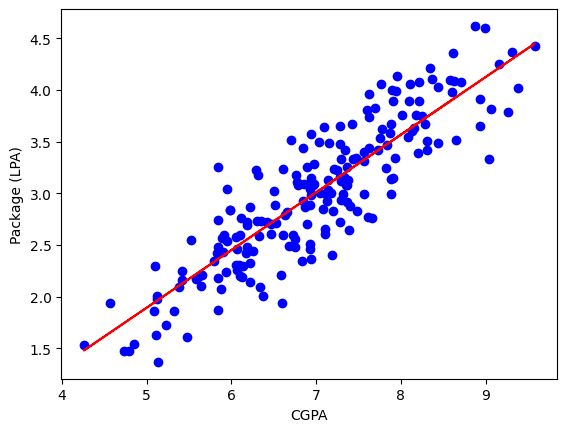

In [40]:
plt.scatter(df['cgpa'], df['package'], color='blue')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)') 
plt.show()

In [41]:
m = lr.coef_
b = lr.intercept_

In [42]:
m

array([0.55795197])

In [43]:
b

-0.8961119222429144

In [44]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [47]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [48]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [50]:
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.780730147510384


In [51]:
r2 = r2_score(y_test,y_pred)

In [52]:
X_test.shape

(40, 1)

In [53]:
1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 1)

0.7749598882343415

In [57]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)
new_df = new_df[['cgpa', 'random_feature', 'package']]
new_df

,cgpa,random_feature,package
0,6.89,0.788848,3.26
1,5.12,0.889688,1.98
2,7.82,0.791070,3.25
3,7.42,0.406003,3.67
4,6.94,0.693021,3.57
...,...,...,...
195,6.93,0.650794,2.46
196,5.89,0.283988,2.57
197,7.21,0.455105,3.24
198,7.63,0.367879,3.96


Text(0, 0.5, 'Package (LPA)')

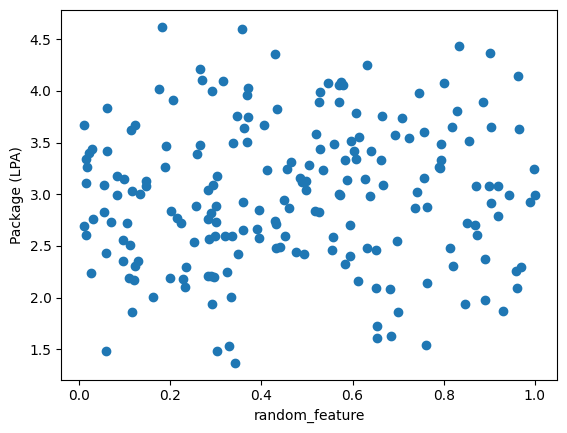

In [58]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package (LPA)')

In [59]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
print("R2 Score", r2_score(y_test, y_pred))

R2 Score 0.7812863818297989


In [67]:
r2 = r2_score(y_test, y_pred)

In [68]:
1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 1)

0.7755307602990041

In [69]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200) / 10)
new_df2 = new_df2[['cgpa', 'iq', 'package']]

In [70]:
new_df2

,cgpa,iq,package
0,6.89,2.36,3.26
1,5.12,0.78,1.98
2,7.82,4.35,3.25
3,7.42,4.47,3.67
4,6.94,3.47,3.57
...,...,...,...
195,6.93,3.16,2.46
196,5.89,2.57,2.57
197,7.21,2.04,3.24
198,7.63,3.96,3.96


Text(0, 0.5, 'Package (LPA)')

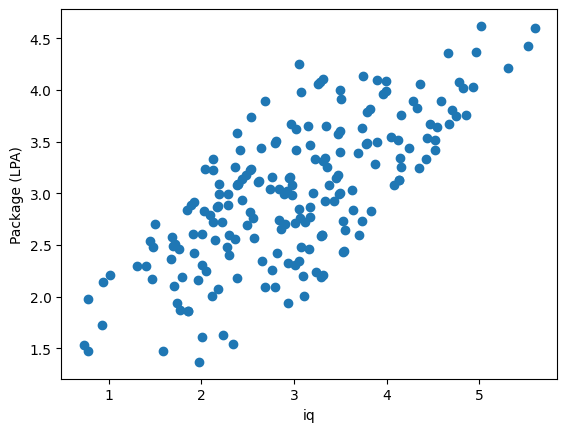

In [71]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package (LPA)')

In [73]:
np.random.randint(-100, 100)

-43

In [74]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = lr.predict(X_test)

In [80]:
print("R2 Score",r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score 0.8393613739734734


In [81]:
1 - ((1 - r2) * (40 - 1)) / (40 - 1 - 1)

0.8351340417096175